# SPHEREx Simple Simulator
- Oct. 10, 2024
- by Yongjung Kim (KASI)


In [2]:
# Import basic modules

import numpy as np
import matplotlib.pyplot as plt
from spherexss import sxss
from astropy import units as u
from astropy.table import Table



In [3]:
# Read BT-Settl model
tbl_model = Table.read('BT-Settl_R500_example.fits',format='fits')
tbl_model


Teff,logg,meta,alpha,wave,f_lambda,f_nu,filename
float64,float64,float64,float64,float64[1576],float64[1576],float64[1576],bytes52
400.0,3.5,-0.0,0.0,2999.9999999999977 .. 70008.19374290173,7.350302301131735e-13 .. 3.0784908576224317,0.22066172428589087 .. 503286070652172.0,bin4spherex/lte004-3.5-0.0.BT-Settl.7.dat.txt
500.0,3.5,-0.0,0.0,2999.9999999999977 .. 70008.19374290173,8.242839719597137e-13 .. 9.36820596204495,0.24745638356377236 .. 1531558086659136.0,bin4spherex/lte005-3.5-0.0.BT-Settl.7.dat.txt
600.0,3.5,-0.0,0.0,2999.9999999999977 .. 70008.19374290173,1.258991080174532e-11 .. 26.53050811410602,3.779587984688651 .. 4337331438907142.5,bin4spherex/lte006-3.5-0.0.BT-Settl.7.dat.txt
700.0,3.5,-0.0,0.0,2999.9999999999977 .. 70008.19374290173,8.373970706787905e-10 .. 61.970703088376524,251.39303658229798 .. 1.0131260119118628e+16,bin4spherex/lte007-3.5-0.0.BT-Settl.7.dat.txt
800.0,3.5,-0.0,0.0,2999.9999999999977 .. 70008.19374290173,5.026662492865638e-09 .. 121.35777142947876,1509.0427136692904 .. 1.9840135556880644e+16,bin4spherex/lte008-3.5-0.0.BT-Settl.7.dat.txt
900.0,3.5,-0.0,0.0,2999.9999999999977 .. 70008.19374290173,1.5836537374393658e-08 .. 204.15541398430724,4754.250234325198 .. 3.3376281060611588e+16,bin4spherex/lte009-3.5-0.0.BT-Settl.7.dat.txt
1000.0,4.0,-0.0,0.0,2999.9999999999977 .. 70008.19374290173,1.9111978210744746e-07 .. 144.28352551507447,57375.62747382472 .. 2.3588144962823332e+16,bin4spherex/lte010-4.0-0.0.BT-Settl.7.dat.txt
1100.0,3.5,-0.0,0.0,2999.9999999999977 .. 70008.19374290173,4.781850072858165e-07 .. 358.0782198562782,143554.8143633534 .. 5.854030061884752e+16,bin4spherex/lte011-3.5-0.0.BT-Settl.7.dat.txt
1200.0,3.5,-0.0,0.0,2999.9999999999977 .. 70008.19374290173,1.5220604154151356e-06 .. 434.8242276070712,456934.23477438523 .. 7.1087096586586264e+16,bin4spherex/lte012-3.5-0.0.BT-Settl.7.dat.txt


In [4]:
# sxss
def run_sxss(idx): 
    w = np.array(tbl_model[idx]['wave']) * u.AA
    f_lambda = np.array(tbl_model[idx]['f_lambda']) * u.erg /u.s/u.cm/u.cm/u.AA
    sc = 1e-16 # scaling factor to see errors
    f_lambda = f_lambda*sc
    sx = sxss(w,f_lambda)

    # simulation
    sx.smooth()
    sx.filtering()
    sx.obssimul()
    sx.plot_f_nu_btsettl(tbl_model['filename'][idx])

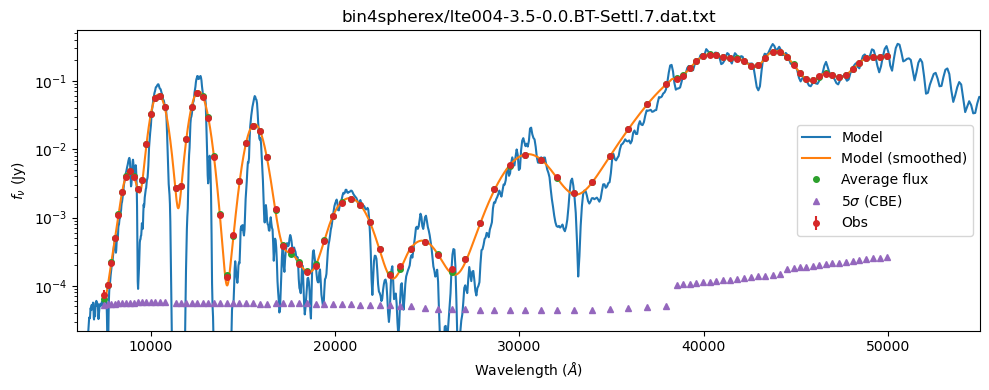

In [7]:
run_sxss(0)